# R5.A.12

# Classification - Travail à faire


## Worldwide Governance Indicators

La banque mondiale fournit un grand nombre de données, dont des indicateurs de gouvernance au niveau mondial (voir [ici](https://data.worldbank.org/data-catalog/worldwide-governance-indicators)). Le code ci-dessous importe les données 2019 présentes dans le fichier [WGI_Data.csv](./wgi2019.csv) (que vous devez donc télécharger). Les informations concernant la définition des indicateurs sont les suivantes :

- **`CC` : Control of Corruption**
    - Control of Corruption captures perceptions of the extent to which public power is exercised for private gain, including both petty and grand forms of corruption, as well as capture" of the state by elites and private interests. Estimate gives the country's score on the aggregate indicator
- **`GE` : Government Effectiveness**
    - Government Effectiveness captures perceptions of the quality of public services, the quality of the civil service and the degree of its independence from political pressures, the quality of policy formulation and implementation, and the credibility of the government's commitment to such policies. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 to 2.5.	
- **`PV` : Political Stability and Absence of Violence/Terrorism**
    - Political Stability and Absence of Violence/Terrorism measures perceptions of the likelihood of political instability and/or politically-motivated violence, including terrorism. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 to 2.5.
- **`RQ` : Regulatory Quality**
    - Regulatory Quality captures perceptions of the ability of the government to formulate and implement sound policies and regulations that permit and promote private sector development. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 to 2.5.
- **`RL` : Rule of Law**
    - Rule of Law captures perceptions of the extent to which agents have confidence in and abide by the rules of society, and in particular the quality of contract enforcement, property rights, the police, and the courts, as well as the likelihood of crime and violence. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 to 2.5.
- **`VA` : Voice and Accountability**
    - Voice and Accountability captures perceptions of the extent to which a country's citizens are able to participate in selecting their government, as well as freedom of expression, freedom of association, and a free media. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 to 2.5.

In [1]:
import pandas as pd

wgi = pd.read_csv("wgi2019.csv")
wgi = wgi.interpolate()
wgi

/tmp/ipykernel_9720/2298334980.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  wgi = wgi.interpolate()


,Country,Code,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
0,Aruba,ABW,1.294189,1.357372,1.029933,0.857360,1.263128,1.217238
1,Andorra,ADO,1.139154,1.615139,1.908749,1.228176,1.579939,1.234392
2,Afghanistan,AFG,-0.988032,-2.649407,-1.463875,-1.120555,-1.713527,-1.401076
3,Angola,AGO,-0.777283,-0.311101,-1.117144,-0.893871,-1.054343,-1.054683
4,Anguilla,AIA,-0.312739,1.367357,0.815824,0.846231,0.355737,1.234392
...,...,...,...,...,...,...,...,...
209,Serbia,SRB,0.026626,-0.091665,0.019079,0.113867,-0.119070,-0.445551
210,South Africa,ZAF,0.670388,-0.217931,0.367380,0.156172,-0.076408,0.084924
211,"Congo, Dem. Rep.",ZAR,-1.365966,-1.808007,-1.627429,-1.509667,-1.786088,-1.538931
212,Zambia,ZMB,-0.286199,-0.102216,-0.675215,-0.554269,-0.462069,-0.640345


### Travail à faire

Vous devez donc réaliser les étapes suivantes :

- Utiliser une CAH (avec Ward) pour chercher un nombre de classes intéressants, et récupérer la partition proposée par la CAH avec ce nombre de classes
- Chercher une partition avec $k$-means, en cherchant le nombre de classes
- Comparer les deux partitions obtenues (CAH et $k$-means) :
    - En comparant les centres des classes
    - ou autres critères

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import scale

In [3]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [9]:
hac = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hac.fit(scale(wgi.iloc[:,2:]))

,n_clusters,None
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,0
,compute_distances,False


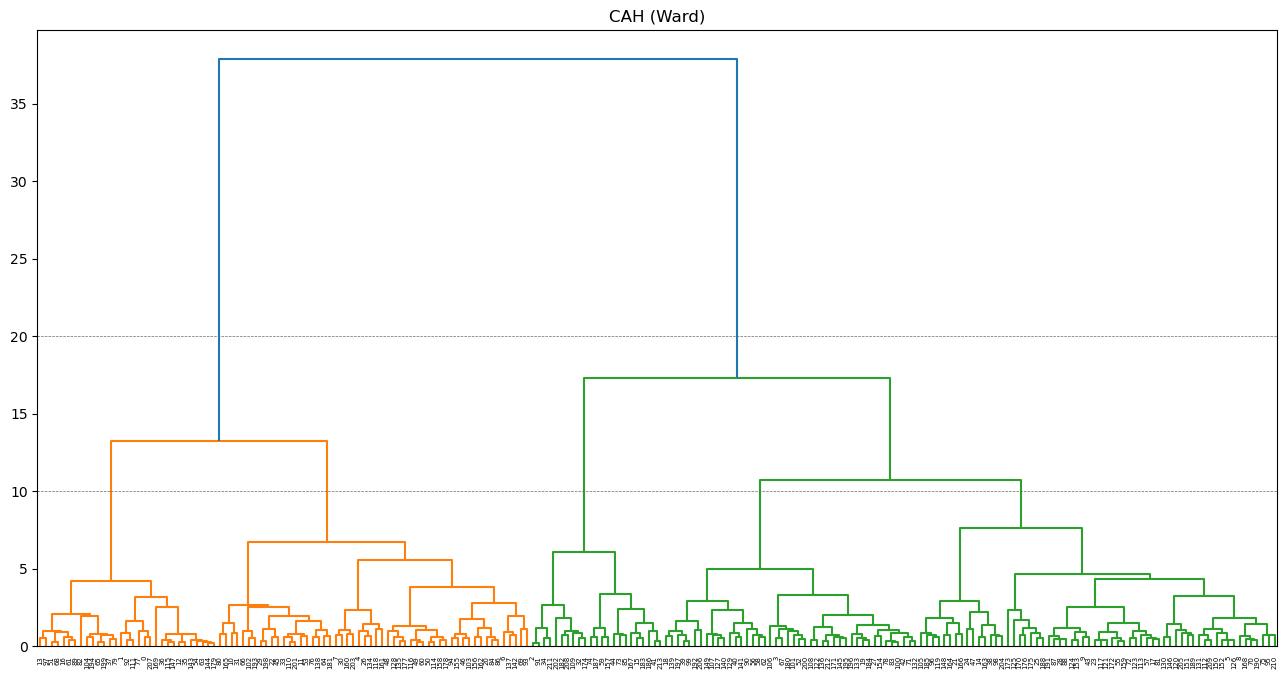

In [13]:
plt.figure(figsize = (16, 8))
plt.title("CAH (Ward)")
plot_dendrogram(hac)
plt.axhline(y = 20, linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = 10, linewidth = .5, color = "dimgray", linestyle = "--")
plt.show()

## Spotify

A partir des données Spotify disponibles sur _Ametice_, nous souhaitons savoir s'il y a des classes qui existent dans ces 35853 chansons. Comme le nombre est assez important, nous allons réaliser une classification hybride.

### Etapes à suivre 

- Télécharger les données
- Les importer dans python
- Créer un jeu de données comportant uniquement les variables quantitatives suivantes :
    - danceability
    - energy
    - loudness
    - speechiness
    - acousticness
    - instrumentalness
    - liveness
    - valence
    - tempo
    - duration_ms
    - popularity
- Réduire les données à 100 classes avec $k$-means
- Réaliser une CAH sur ces 100 classes (en utilisant le centre de gravité de chacune des classes obtenues), et estimer le nombre de classes
- Refaire $k$-means avec ce nombre de classes obtenus

In [15]:
spt = pd.read_csv("spotify_dataset.csv")
#spt = spt.dropna()
spt.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity,decade
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1,60s
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0,60s
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0,60s
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0,60s
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0,60s


In [13]:
fields = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "popularity"]
data = spt[fields]

In [16]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import scale

In [18]:
kmeans = KMeans(n_clusters=100)
kmeans.fit(scale(data))

KMeans(n_clusters=100)

In [30]:
clusters = pd.DataFrame(kmeans.cluster_centers_, columns=fields)

In [31]:
hac = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hac.fit(scale(clusters))

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

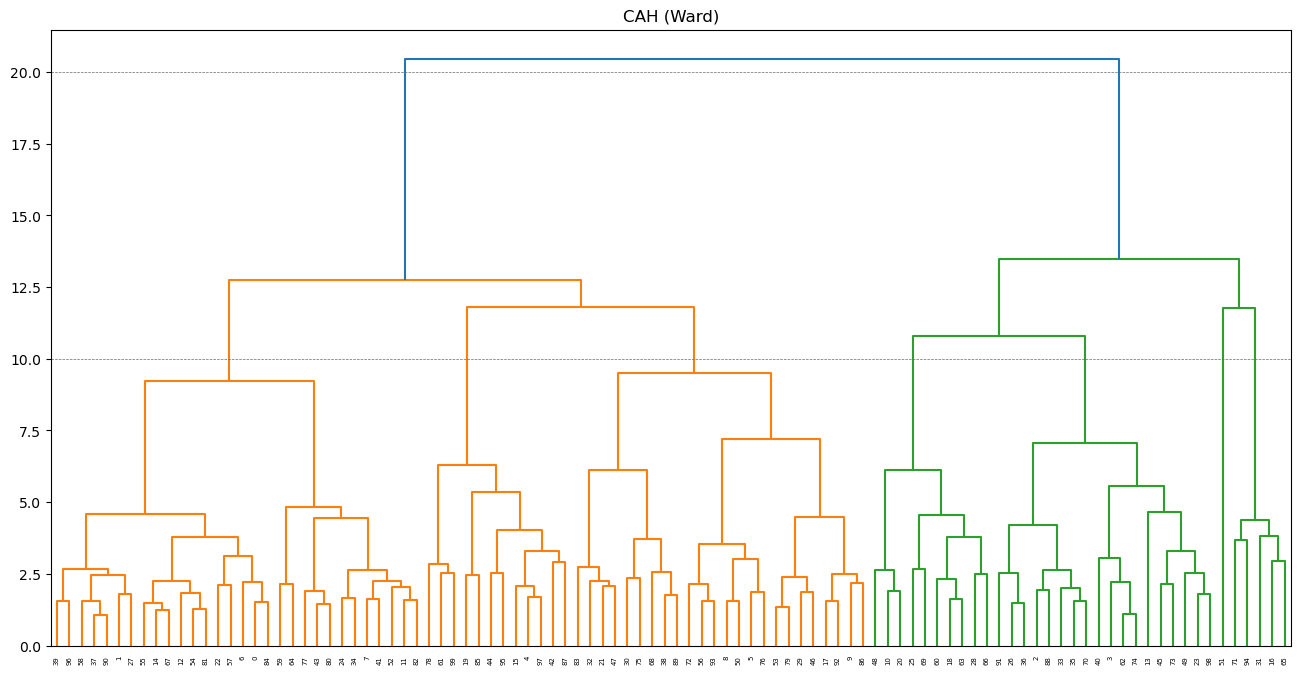

In [32]:
plt.figure(figsize = (16, 8))
plt.title("CAH (Ward)")
plot_dendrogram(hac)
plt.axhline(y = 20, linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = 10, linewidth = .5, color = "dimgray", linestyle = "--")
plt.show()

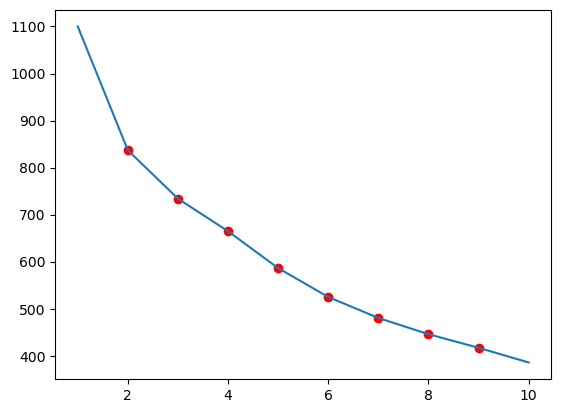

In [38]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "random", n_init = 20).fit(scale(clusters))
    inertia = inertia + [kmeans.inertia_]
inertia = pd.DataFrame({"k": range(1, 11), "inertia": inertia})
# print(inertia)
# seaborn.lineplot(data = inertia, x = "k", y = "inertia")
plt.plot(inertia["k"], inertia["inertia"])
for i in range(2, 10):
    plt.scatter(i, inertia.query('k == '+str(i))["inertia"], c = "red")
plt.show()

On dirait que 2 est encore le meilleur nombre de clusters.